

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

"PatientId": indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.

"AppointmentID": indicates appoint ID, this field should be unique

"Gender": indicates the patient's gender (M/F)

"AppointmentDay": indicates the date/time the patient called to book their appointment.

"Age": indicates the patient's age.

"ScheduledDay" tells us on what day the patient set up their appointment.

"Neighborhood" indicates the location of the hospital.

"Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

"Hipertension": indicates whether or not the patient is experiencing Hypertension.

"Diabetes": indicates whether or not the patient is experiencing Diabetes.

"Alcoholism": indicates whether or not the patient is experiencing Alcoholism.

"Handcap": indicates whether or not the patient is with special needs.

"SMS_received": indicates whether or not the patient has received a reminder text message.

"No-show" ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis


1-What is the overall appointment show vs no show rate?

2- What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling


In [3]:
pd.options.display.max_rows = 999999

In [4]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There isn't any missing values

In [7]:
df.shape

(110527, 14)

### Rename columns to be easier usage

In [8]:
df.rename(str.lower, axis='columns',inplace=True)
df.rename(columns={"no-show": "no_show"},inplace=True)

In [9]:
df.rename(columns={"patientid":"patient_id","appointmentid":"appointment_id","scheduledday":"scheduled_day","appointmentday":"appointment_day"},inplace=True)

In [10]:
 df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


### drop patient_id and	appointment_id

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['patient_id', 'appointment_id'], axis = 1, inplace = True)

### drop duplicated rows

In [12]:
# Check for duplicate rows 
df.duplicated().sum()

635

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109892 entries, 0 to 110526
Data columns (total 12 columns):
gender             109892 non-null object
scheduled_day      109892 non-null object
appointment_day    109892 non-null object
age                109892 non-null int64
neighbourhood      109892 non-null object
scholarship        109892 non-null int64
hipertension       109892 non-null int64
diabetes           109892 non-null int64
alcoholism         109892 non-null int64
handcap            109892 non-null int64
sms_received       109892 non-null int64
no_show            109892 non-null object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


In [16]:
df.shape

(109892, 12)

In [17]:
df.age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

### drop invalid value of age

In [18]:
df = df[df.age != -1]
df.shape

(109891, 12)

In [19]:
df.age.value_counts()

0      3530
1      2271
52     1738
49     1645
53     1641
38     1624
56     1623
2      1616
59     1612
50     1601
57     1597
36     1567
51     1561
19     1533
39     1525
54     1523
34     1518
33     1516
37     1516
6      1512
3      1509
30     1505
17     1498
32     1488
5      1482
18     1474
44     1474
58     1459
46     1451
45     1450
21     1441
28     1440
20     1428
7      1420
31     1419
8      1412
55     1406
60     1403
29     1397
40     1393
48     1392
16     1389
47     1388
27     1372
35     1371
63     1368
22     1367
9      1357
23     1344
41     1339
43     1332
61     1332
64     1327
25     1322
62     1307
4      1297
26     1273
42     1268
10     1266
24     1233
15     1205
11     1187
66     1186
14     1110
13     1095
65     1095
12     1089
68     1012
67      972
69      826
73      720
70      718
71      692
72      614
74      601
76      570
78      541
75      540
77      525
80      509
81      430
82      391
79      389
84  

In [20]:
df.age.max()

115

In [21]:
#group of age:
labels = [ '0-24','25-49','50-74','75-99','100-124']
df['age_group'] = pd.cut(df.age, range(0, 126, 25), right=False, labels=labels)
df['age_group'] = df.age_group.astype(str)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109891 entries, 0 to 110526
Data columns (total 13 columns):
gender             109891 non-null object
scheduled_day      109891 non-null object
appointment_day    109891 non-null object
age                109891 non-null int64
neighbourhood      109891 non-null object
scholarship        109891 non-null int64
hipertension       109891 non-null int64
diabetes           109891 non-null int64
alcoholism         109891 non-null int64
handcap            109891 non-null int64
sms_received       109891 non-null int64
no_show            109891 non-null object
age_group          109891 non-null object
dtypes: int64(7), object(6)
memory usage: 11.7+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [23]:
# Use this, and more code cells, to explore data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,50-74
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,50-74
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,50-74
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0-24
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,50-74


In [24]:
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000,109891.000000
mean,37.089853,0.098288,0.197250,0.071826,0.030430,0.022131,0.322884
std,23.121015,0.297705,0.397924,0.258200,0.171769,0.160879,0.467581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matpl

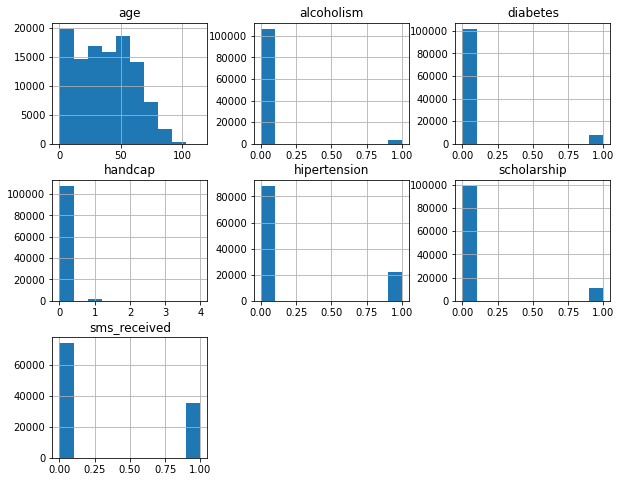

In [25]:
df.hist(figsize=(10,8));

### Research Question 1: what is the overall appointment show vs no show rate?

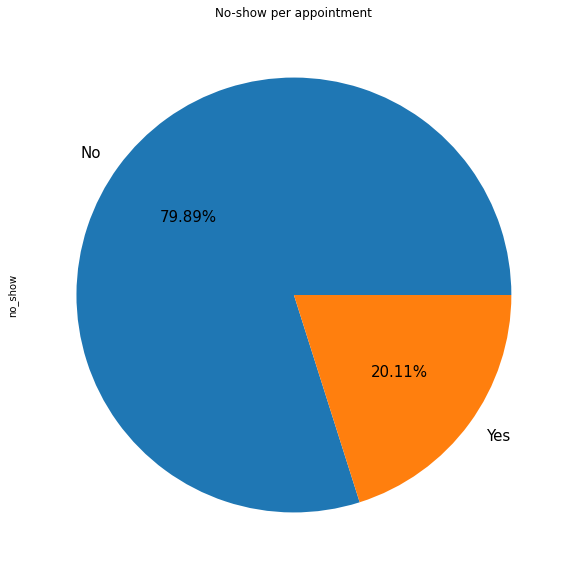

In [26]:
pp=df.no_show.value_counts()
pp.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='No-show per appointment');

 the overall show rate is 79.89%.
 
 the overall no show rate is 20.11%.

In [27]:
attend = df[df.no_show == "No"]
miss = df[df.no_show == "Yes"]

### Research Question 2 What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

### Q2.1 Gender?

In [28]:
df.gender.value_counts()

F    71416
M    38475
Name: gender, dtype: int64

In [29]:
N_of_female = df[df.gender == "F"].gender.count()
N_of_male = df[df.gender == "M"].gender.count()

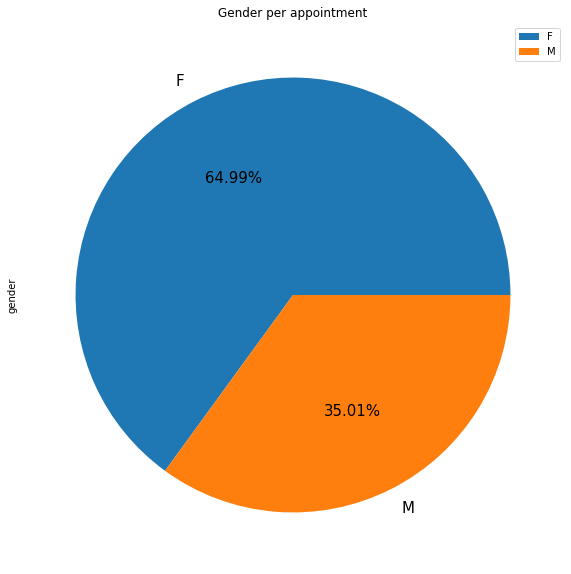

In [30]:
df.gender.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='Gender per appointment')
plt.legend();

In [31]:
attend.gender.value_counts()

F    56961
M    30832
Name: gender, dtype: int64

In [32]:
female_att = attend[attend.gender == "F"].gender.count()
male_att = attend[attend.gender == "M"].gender.count()

In [33]:
miss.gender.value_counts()

F    14455
M     7643
Name: gender, dtype: int64

In [34]:
female_miss=miss[miss.gender == "F"].gender.count()
male_miss=miss[miss.gender == "M"].gender.count()

In [35]:
pct_female_att=female_att/N_of_female
pct_female_miss=female_miss/N_of_female
pct_male_att=male_att/N_of_male
pct_male_miss=male_miss/N_of_male
print('show Female= ',pct_female_att*100,'%')
print('no show Female= ',pct_female_miss*100,'%')
print('show male= ',pct_male_att*100,'%')
print('no show male= ',pct_male_miss*100,'%')

show Female=  79.75943766102834 %
no show Female=  20.24056233897166 %
show male=  80.1351526965562 %
no show male=  19.864847303443796 %


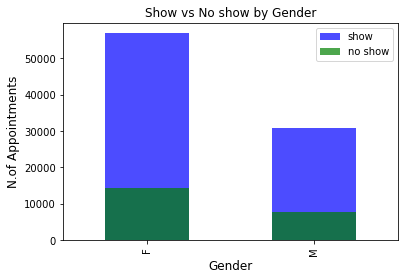

In [36]:
attend.gender.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.gender.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Gender')
ax.set_xlabel('Gender', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend();

#### summary:

The proportion of appointments where patients who are females is 64.99%

The proportion of appointments where patients who are males is 35.01%

The Show up rate of patients who are male is the highest with 80.14%, where the show up rate of patients who are female is 79.75%

### Q2.2 Age?

There are many values of age so i will make a new columns of group of age

In [37]:
df.age_group.value_counts()

0-24       37065
25-49      35985
50-74      30934
75-99       5898
100-124        9
Name: age_group, dtype: int64

In [38]:
N_from_0_to_24=df[df.age_group == "0-24"].age_group.count()
N_from_25_to_49=df[df.age_group == "25-49"].age_group.count()
N_from_50_to_74=df[df.age_group == "50-74"].age_group.count()
N_from_75_to_99=df[df.age_group == "75-99"].age_group.count()
N_from_100_to_124=df[df.age_group == "100-124"].age_group.count()

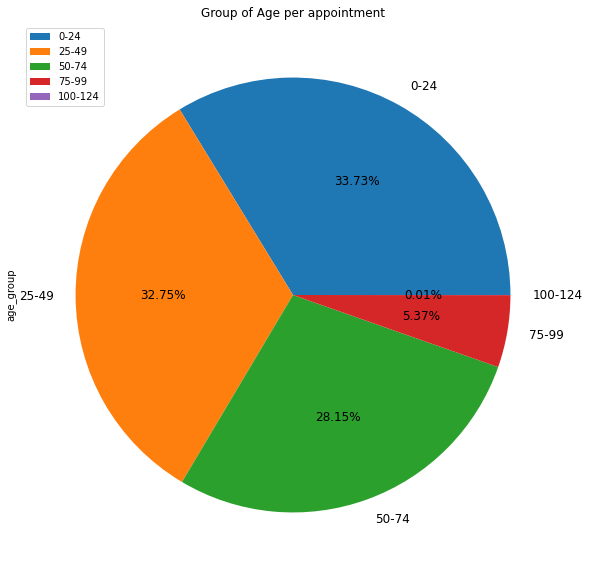

In [39]:
pp=df.age_group.value_counts()
pp.plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 12,title='Group of Age per appointment')
plt.legend();

In [40]:
g1_att=attend[attend.age_group == "0-24"].age_group.count()
g2_att=attend[attend.age_group == "25-49"].age_group.count()
g3_att=attend[attend.age_group == "50-74"].age_group.count()
g4_att=attend[attend.age_group == "75-99"].age_group.count()
g5_att=attend[attend.age_group == "100-124"].age_group.count()

In [41]:
g1_miss=miss[miss.age_group == "0-24"].age_group.count()
g2_miss=miss[miss.age_group == "25-49"].age_group.count()
g3_miss=miss[miss.age_group == "50-74"].age_group.count()
g4_miss=miss[miss.age_group == "75-99"].age_group.count()
g5_miss=miss[miss.age_group == "100-124"].age_group.count()

In [42]:
pct_g1_att=g1_att/N_from_0_to_24
pct_g1_miss=g1_miss/N_from_0_to_24
pct_g2_att=g2_att/N_from_25_to_49
pct_g2_miss=g2_miss/N_from_25_to_49
pct_g3_att=g3_att/N_from_50_to_74
pct_g3_miss=g3_miss/N_from_50_to_74
pct_g4_att=g4_att/N_from_75_to_99
pct_g4_miss=g4_miss/N_from_75_to_99
pct_g5_att=g5_att/N_from_100_to_124
pct_g5_miss=g5_miss/N_from_100_to_124
print('from_0_to_24 show= ',pct_g1_att*100,'%')
print('from_0_to_24 no show= ',pct_g1_miss*100,'%')
print('from_25_to_49 show= ',pct_g2_att*100,'%')
print('from_25_to_49 no show= ',pct_g2_miss*100,'%')
print('from_50_to_74 show= ',pct_g3_att*100,'%')
print('from_50_to_74 no show= ',pct_g3_miss*100,'%')
print('from_75_to_99 show= ',pct_g4_att*100,'%')
print('from_75_to_99 no show= ',pct_g4_miss*100,'%')
print('from_100_to_124 show= ',pct_g5_att*100,'%')
print('from_100_to_124 no show= ',pct_g5_miss*100,'%')

from_0_to_24 show=  77.33980844462431 %
from_0_to_24 no show=  22.660191555375693 %
from_25_to_49 show=  78.47436431846603 %
from_25_to_49 no show=  21.525635681533974 %
from_50_to_74 show=  83.77513415659146 %
from_50_to_74 no show=  16.224865843408548 %
from_75_to_99 show=  84.19803323160393 %
from_75_to_99 no show=  15.801966768396067 %
from_100_to_124 show=  77.77777777777779 %
from_100_to_124 no show=  22.22222222222222 %


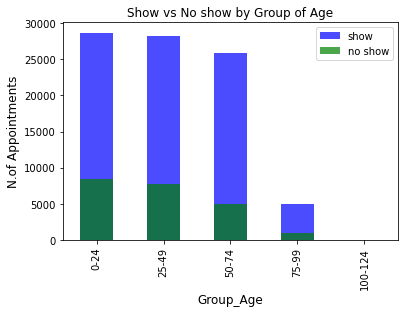

In [43]:
attend.age_group.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.age_group.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Group of Age')
ax.set_xlabel('Group_Age', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend();

#### summary:

The proportion of appointments where patients who are group1 (from 0 to 24) is 33.73%

The proportion of appointments where patients who are group2 (from 25 to 49) is 32.75%

The proportion of appointments where patients who are group3 (from 50 to 74) is 28.15%

The proportion of appointments where patients who are group4 (from 75 to 99) is 5.37%

The proportion of appointments where patients who are group5 (from 100 to 124) is 0.01%

The Show up rate of patients who are group4 is the highest with 84.19%

### Q2.3 Scholarship?

In [44]:
df.scholarship.value_counts()

0    99090
1    10801
Name: scholarship, dtype: int64

In [45]:
N_scholarship=df[df.scholarship == 1].scholarship.count()
N_no_scholarship=df[df.scholarship == 0].scholarship.count()

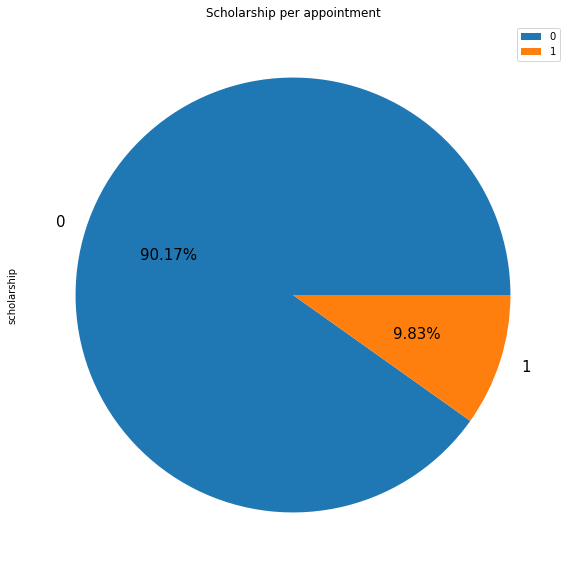

In [46]:
df.scholarship.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='Scholarship per appointment')
plt.legend();

In [47]:
scholarship_att=attend[attend.scholarship == 1].scholarship.count()
no_scholarship_att=attend[attend.scholarship == 0].scholarship.count()

In [48]:
scholarship_miss=miss[miss.scholarship == 1].scholarship.count()
no_scholarship_miss=miss[miss.scholarship == 0].scholarship.count()

In [49]:
pct_scholarship_att=scholarship_att/N_scholarship
pct_scholarship_miss=scholarship_miss/N_scholarship
pct_no_scholarship_att=no_scholarship_att/N_no_scholarship
pct_no_scholarship_miss=no_scholarship_miss/N_no_scholarship
print('scholarship show= ',pct_scholarship_att*100,'%')
print('scholarship no show= ',pct_scholarship_miss*100,'%')
print('No scholarship show= ',pct_no_scholarship_att*100,'%')
print('No scholarship no show= ',pct_no_scholarship_miss*100,'%')

scholarship show=  76.3355244884733 %
scholarship no show=  23.66447551152671 %
No scholarship show=  80.27853466545565 %
No scholarship no show=  19.72146533454435 %


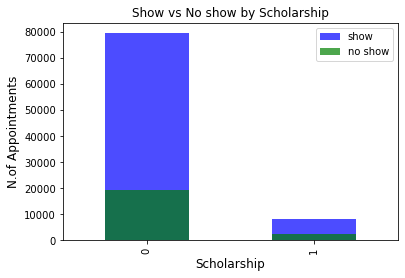

In [50]:
attend.scholarship.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.scholarship.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by Scholarship')
ax.set_xlabel('Scholarship', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend();

#### summary:

The proportion of appointments where patients who have scholarship is 9.83%

The proportion of appointments where patients who don't have scholarship is 90.17%

The Show up rate of patients who are don't have scholarship is the highest with 80.27%, where the show up rate of patients who have scholarship is 76.33%

### Q2.4 SMS_Received?

In [51]:
df.sms_received.value_counts()

0    74409
1    35482
Name: sms_received, dtype: int64

In [52]:
N_received_sms=df[df.sms_received == 1].sms_received.count()
N_no_sms=df[df.sms_received == 0].sms_received.count()

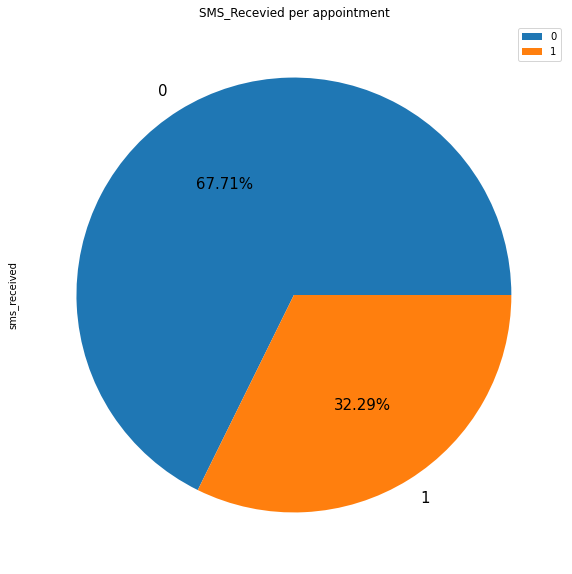

In [53]:
df.sms_received.value_counts().plot.pie(figsize=(10,10), autopct='%1.2f%%', fontsize = 15,title='SMS_Recevied per appointment')
plt.legend();

In [54]:
received_sms_att=attend[attend.sms_received == 1].sms_received.count()
no_sms_att=attend[attend.sms_received == 0].sms_received.count()

In [55]:
received_sms_miss=miss[miss.sms_received == 1].sms_received.count()
no_sms_miss=miss[miss.sms_received == 0].sms_received.count()

In [56]:
pct_received_sms_att=received_sms_att/N_received_sms
pct_received_sms_miss=received_sms_miss/N_received_sms
pct_no_sms_att=no_sms_att/N_no_sms
pct_no_sms_miss=no_sms_miss/N_no_sms
print('sms recevied show= ',pct_received_sms_att*100,'%')
print('sms recevied no show= ',pct_received_sms_miss*100,'%')
print('No sms received show= ',pct_no_sms_att*100,'%')
print('No sms received no show= ',pct_no_sms_miss*100,'%')

sms recevied show=  72.425455160363 %
sms recevied no show=  27.574544839637 %
No sms received show=  83.45092663521886 %
No sms received no show=  16.54907336478114 %


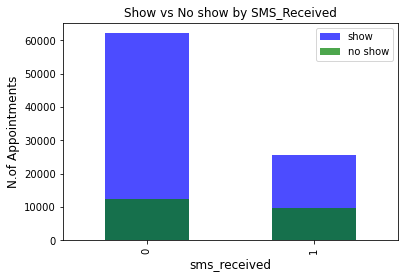

In [57]:
attend.sms_received.value_counts().plot(kind='bar',alpha=0.7, color= 'blue', label='show')
ax=miss.sms_received.value_counts().plot(kind='bar',alpha=0.7, color= 'green', label='no show')
ax.set_title('Show vs No show by SMS_Received')
ax.set_xlabel('sms_received', fontsize = 12)
ax.set_ylabel('N.of Appointments', fontsize = 12)
plt.legend();

#### summary:

The proportion of appointments where patients who receive sms  67.71%

The proportion of patients who don't receive sms is  32.29%

The Show-up rate of patients who don't receive sms is the highest with 83.45%, where the show-up rate of patients who receive sms is 72.42%

<a id='conclusions'></a>
## Conclusions



### Limitations


Limitations & Assumptions:

1-Most of the calculations performed in this project are based on the number of apppointments not patients.

2- As we were not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 data entries from the original dataset. original size 110527; new size: 110526.

questions:

1-What is the overall appointment show vs no show rate?

2- What factors are important to know in order to predict if a patient will show up for their scheduled appointment?

results:

1-the overall show rate is 79.89%.
 
2-the overall no show rate is 20.11%.

3-The proportion of appointments where patients who are females is 64.99%

4-The proportion of appointments where patients who are males is 35.01%

5-The Show up rate of patients who are male is the highest with 80.14%, where the show up rate of patients who are female is 79.75%

6-The proportion of appointments where patients who are (from 0 to 24) is 33.73%

7-The proportion of appointments where patients who are (from 25 to 49) is 32.75%

8-The proportion of appointments where patients who are (from 50 to 74) is 28.15%

9-The proportion of appointments where patients who are (from 75 to 99) is 5.37%

10-The proportion of appointments where patients who are (from 100 to 124) is 0.01%

11-The Show up rate of patients who are (from 75 to 99) is the highest with 84.19%

12-The proportion of appointments where patients who have scholarship is 9.83%

13-The proportion of appointments where patients who don't have scholarship is 90.17%

14-The Show rate of patients who are don't have scholarship is the highest with 80.27%, where the show rate of patients who have scholarship is 76.33%

15-The proportion of appointments where patients who receive sms  67.71%

16-The proportion of patients who don't receive sms is  32.29%

17-The Show-up rate of patients who don't receive sms is the highest with 83.45%, where the show-up rate of patients who receive sms is 72.42%

In [58]:
x = df.drop(['no_show', 'gender', 'scheduled_day', 'appointment_day', 'neighbourhood', 'age_group'], axis = 1)
y = df['no_show']

In [59]:
y = np.where(y == "Yes", 1, 0)

In [60]:
import statsmodels.api as sms;
from sklearn.datasets import load_boston

In [61]:
import statsmodels.api as sm;
x['intercept']=1
ml=sm.Logit(y,x[['intercept','age', 'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']])
results=ml.fit()

Optimization terminated successfully.
         Current function value: 0.491563
         Iterations 6


In [62]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.021      
Dependent Variable: y                AIC:              108052.7157
Date:               2022-11-08 22:29 BIC:              108129.5737
No. Observations:   109891           Log-Likelihood:   -54018.    
Df Model:           7                LL-Null:          -55155.    
Df Residuals:       109883           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -1.4014    0.0159  -88.3831  0.0000  -1.4325  -1.3703
age           -0.0066    0.0004  -16.8904  0.0000  -0.0074  -0.0058
scholarship    0.1894    0.0244    7.7674  0.0000   0.1416   0.2372
hipertension  -0.0707    0.0247   -2.8601  0.0042  -0.1192  -0.0223
diabetes       0.0965    0.0343    2.8160  0.0049   0.0293   0.1636
alcoholism     0.1312    0.0447    2.9327  0.0034   0.0435   0.2188
handcap        0.0287    0.0490    0.5868  0.5573  -0.0672   0.1247
sms_received   0.6621    0.0155   42.6914  0.0000   0.6317   0.6924
==================================================================

"""

In [63]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [64]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [65]:
pred_trn=lin_reg.predict(Xtrain)
pred_tst=lin_reg.predict(Xtest)

In [66]:
pred_tst

array([0.16407932, 0.288706  , 0.21948974, ..., 0.11515037, 0.1727778 ,
       0.17603973])

In [67]:
for i in range(pred_trn.size):
    if pred_trn[i]>=0.5:
        pred_trn[i]=1
    else:
        pred_trn[i]=0

In [68]:
for i in range(pred_tst.size):
    if pred_tst[i]>=0.5:
        pred_tst[i]=1
    else:
        pred_tst[i]=0

In [69]:
pred_tst

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred_tst)

0.800445880158333

In [71]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [72]:
def mape(y_true, y_pred):
    """
    This function calculates MAPE.
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :returns: mean absolute percentage error
    """
    return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)

def adjR(y_true, y_pred,p):
    R2=r2_score(y_true,y_pred)
    n=10
    return 1-(1-R2)*(n-1)/(n-p-1)

In [73]:
# Performance on train data
LR1_tr_R2score=r2_score(ytrain,pred_trn)
LR1_tr_RMSE=np.sqrt(mean_squared_error(ytrain, pred_trn))
LR1_tr_MSE=mean_squared_error(ytrain, pred_trn)
LR1_tr_MAE=mean_absolute_error(ytrain, pred_trn)
LR1_tr_MAPE=mape(ytrain, pred_trn)
LR1_tr_AR2=adjR(ytrain, pred_trn,p=len(x.columns))

# Performance on test data
LR1_te_R2score=r2_score(ytest,pred_tst)
LR1_te_RMSE=np.sqrt(mean_squared_error(ytest,pred_tst))
LR1_te_MSE=mean_squared_error(ytest, pred_tst)
LR1_te_MAE=mean_absolute_error(ytest, pred_tst)
LR1_te_MAPE=mape(ytest, pred_tst)
LR1_te_AR2=adjR(ytest, pred_tst,p=len(x.columns))

model_comp=pd.DataFrame({'Algorithm':['Simple Linear Reg Model'],
                       'train Score':LR1_tr_R2score,'RMSE_tr': LR1_tr_RMSE, 'MSE_tr': LR1_tr_MSE, 'MAE_tr': LR1_tr_MAE,
                         "Mape_tr":LR1_tr_MAPE, "Adjusted_r2_tr":LR1_tr_AR2,
                      'test Score':LR1_te_R2score,'RMSE_te': LR1_te_RMSE, 'MSE_te': LR1_te_MSE, 'MAE_te': LR1_te_MAE,
                        "Mape_te":LR1_te_MAPE, "Adjusted_r2_te":LR1_te_AR2})
model_comp

<ipython-input-72-10a015b7759f>:8: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
<ipython-input-72-10a015b7759f>:8: RuntimeWarning: invalid value encountered in true_divide
  return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)


,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Simple Linear Reg Model,-0.252308,0.448859,0.201474,0.201474,NaN,-10.270769,-0.249304,0.446715,0.199554,0.199554,NaN,-10.243733


In [74]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(Xtrain, ytrain)

LogisticRegression()

In [75]:
pred_trn=lin_reg.predict(Xtrain)
pred_tst=lin_reg.predict(Xtest)

In [76]:
# Performance on train data
LR1_tr_R2score=r2_score(ytrain,pred_trn)
LR1_tr_RMSE=np.sqrt(mean_squared_error(ytrain, pred_trn))
LR1_tr_MSE=mean_squared_error(ytrain, pred_trn)
LR1_tr_MAE=mean_absolute_error(ytrain, pred_trn)
LR1_tr_MAPE=mape(ytrain, pred_trn)
LR1_tr_AR2=adjR(ytrain, pred_trn,p=len(x.columns))

# Performance on test data
LR1_te_R2score=r2_score(ytest,pred_tst)
LR1_te_RMSE=np.sqrt(mean_squared_error(ytest,pred_tst))
LR1_te_MSE=mean_squared_error(ytest, pred_tst)
LR1_te_MAE=mean_absolute_error(ytest, pred_tst)
LR1_te_MAPE=mape(ytest, pred_tst)
LR1_te_AR2=adjR(ytest, pred_tst,p=len(x.columns))

model_comp=pd.DataFrame({'Algorithm':['Logistic Reg Model'],
                       'train Score':LR1_tr_R2score,'RMSE_tr': LR1_tr_RMSE, 'MSE_tr': LR1_tr_MSE, 'MAE_tr': LR1_tr_MAE,
                         "Mape_tr":LR1_tr_MAPE, "Adjusted_r2_tr":LR1_tr_AR2,
                      'test Score':LR1_te_R2score,'RMSE_te': LR1_te_RMSE, 'MSE_te': LR1_te_MSE, 'MAE_te': LR1_te_MAE,
                        "Mape_te":LR1_te_MAPE, "Adjusted_r2_te":LR1_te_AR2})
model_comp

<ipython-input-72-10a015b7759f>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)
<ipython-input-72-10a015b7759f>:8: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs(np.array(y_pred) - np.array(y_true)) / np.array(y_true), axis=0)


,Algorithm,train Score,RMSE_tr,MSE_tr,MAE_tr,Mape_tr,Adjusted_r2_tr,test Score,RMSE_te,MSE_te,MAE_te,Mape_te,Adjusted_r2_te
0,Logistic Reg Model,0.022251,0.396614,0.157303,0.314605,inf,-7.799741,0.016654,0.396323,0.157072,0.314515,inf,-7.850116
